# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
28.1.2022<br>
Team G03: Eric Keränen - Samuel Aitamaa - Teemu Luhtanen<br>
Metropolia University of Applied Sciences

## 1. Introduction

This report shows the data preprocessing, datasplitting, model creation and options, model training and displaying the results of a neural network based on [Heart Disease Health Indicators Dataset (Kaggle)](https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset).

The main objectives of this project is to predict the presence of a heart disease, with the simplest, fastest and smallest network as possible, while aiming to <u>**high sensitivity without losing specificity**</u>.

## 2. Setup

We used libraries, such as matplotlib, pandas, seaborn, tensorflow, sklearn and keras:

In [1]:
# Import libraries
%pylab inline
import time
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Import functions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split as split
from tensorflow.keras import models, layers, losses, metrics, optimizers

# Set the size of plots to a large size
plt.rcParams["figure.figsize"] = (20,10)

# Tensorflow version number
print(f"Tensorflow version: {tf.__version__}")

Populating the interactive namespace from numpy and matplotlib
Tensorflow version: 2.7.0


## 3. Dataset

> "Heart Disease is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. In the United States alone, heart disease claims roughly 647,000 lives each year — making it the leading cause of death. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease."  
> [Heart Disease Health Indicators](https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset)

This dataset consists of 253 679 diagnoses of heart diseases (1 = has a diagnose, 0 = doesn't have) and 21 indicators as floating point numbers for each diagnose, such as blood pressure, cholesterol and age. These indicators are used to train, validate and test the model of our choosing based on the diagnoses.

### 3.1 Importing the dataset

The dataset will be read from a csv-file. We specify that we see question marks (?) as missing values with a <code>na_values</code>-parameter.

In [2]:
df = pd.read_csv("heart_disease_health_indicators.csv", na_values = "?")

### 3.2 Exlopring the dataset

In [3]:
df.describe().round(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.0,253680.00,253680.00,...,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.09,0.43,0.42,0.96,28.38,0.44,0.04,0.3,0.76,0.63,...,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.29,0.49,0.49,0.19,6.61,0.50,0.20,0.7,0.43,0.48,...,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.0,1.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.0,1.00,1.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.0,1.00,1.00,...,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,2.0,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


As we can see from the data in the table above, all of the 21 indicators / explanatory variables are numerical values. This means at least that no conversion to numerical data is needed. Most of the values differ from each other quite a lot (e.g. BMI max value is 98 and HighChol max value is 1) so normalization would be handy so that every numerical value is easily comparable to each other. We can also see from the counts of the features that all have the same amount, this is a good indicators there is no extra or missing columns in the data.

## 4. Preprocessing

Preprocessing datasets is an essential part of any neural network project. Cleaning and transforming the data is to remove outliers and standardize the data so that it takes a form that can be easily used to create a model.

### 4.1 Missing values and splitting labels from features

We preprocess the data by using the <code>fillna()</code> function, that fills all 'not applicable' values with zero and does it so "in place" (meaning it will not create a new data object, but modify the existing one). In the dataset section we also do a little preprocess function by replacing all '?' values with 'not applicable' values by using the <code>na_values = '?'</code> parameter.

No conversion to numerical data was needed, since all data was numerical.

In [4]:
df.fillna(0, inplace = True)

After filling the missing values, we extract the labels (correct evaluations) into a <code>labels</code>-variable. We also extract the data itself from the labels, meaning the features that determine the evaluation, into a <code>features</code>-variable.

In [5]:
# Extract labels and features from the original data
labels = df["HeartDiseaseorAttack"]
features = df.drop("HeartDiseaseorAttack", axis = 1)

### 4.1 Splitting the dataset

With <code>labels</code> and <code>features</code> we split the original dataset into a train dataset, validation dataset and test dataset. The dataset is split with the 80 / 20 rule of thumb. With this rule of thumb we first split the original data into a train dataset and test dataset with 80 % going to training and 20 % going to testing. After this we repeat the procedure and split the training data even further with the 80 / 20 rule of thumb. Now the training dataset (80 % of the original dataset) will be split into a training set and validation set with 80 % going to training and 20 % going to validation. This means that the original dataset will be split as follows:

|Set|Amount allocated|
|---|:---:|
|Training set|64 %|
|Validation set|16 %|
|Test set|20 %|

The test dataset will be used when evaluating the final performance of the model trained with the training dataset and validated with the validation dataset.

In [6]:
# Split original data into 80 % training data and 20 % test data
train_features, test_features, train_labels, test_labels = split(features, labels, test_size=0.20, train_size=0.80, random_state=0)
# Split training data into 80 % training data (64 % of original) and 20 % validation data (16 % of original)
train_features, validation_features, train_labels, validation_labels = split(train_features, train_labels, test_size=0.20, train_size=0.80, random_state=0)

train_percentage = (train_features.count()[0] / features.count()[0]).round(2) * 100
validation_percentage = (validation_features.count()[0] / features.count()[0]).round(2) * 100
test_percentage = (test_features.count()[0] / features.count()[0]).round(2) * 100

print (f"Training set: {train_percentage} % of the original dataset")
print (f"Validation set: {validation_percentage} % of the original dataset")
print (f"Test set: {test_percentage} % of the original dataset")

Training set: 64.0 % of the original dataset
Validation set: 16.0 % of the original dataset
Test set: 20.0 % of the original dataset


### 4.2 Normalization

We also normalize the model, since exploring the model we saw that many of the values differ from each other quite a lot numerically. We accomplish normalization by creating a normalized layer for the model by adapting the layer to the training dataset.

In [7]:
# Create a normalized input layer
normalizer = layers.Normalization()
normalizer.adapt(np.array(train_features))

### 4.3 Weights

We also opted to make weights for the evaluations, since ~90 % of the data is classified as healthy and only ~10 % is classified as diseased. These weights will be used when training the model. The weights are used to balance the imbalance in the data between these two diagnoses. The way how we determine how the class weights are calculated are taken from [tensorflows own page](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#class_weights).

In [8]:
# Calculate how much of the original data is healthy and diseased
healthy, diseased = np.bincount(df['HeartDiseaseorAttack'])
total = healthy + diseased

print(f"Healthy amount: {round(100 * healthy / total, 2)} %")
print(f"Diseased amount: {round(100 * diseased / total, 2)} %\n")

# Because of the imbalance, create weights for the labels
healthyWeight = 1 / healthy * (total / 2.0)
diseaseWeight = 1 / diseased * (total / 2.0)
class_weight = {0: healthyWeight, 1: diseaseWeight}
print(f"Healthy weight: {round(healthyWeight, 2)}")
print(f"Diseased weight: {round(diseaseWeight, 2)}")

Healthy amount: 90.58 %
Diseased amount: 9.42 %

Healthy weight: 0.55
Diseased weight: 5.31


With these weights the model "pays more attention" to the diagnose with the bigger weight, which in this case is the weight for the diseased.

## 5. Modeling

After preprocessing, we created a function, which creates the model. The model is a Sequential one from tensorflows keras library.

### 5.1 Options and model

The function named <code>make_model</code> makes the model with one hidden layer with the amount of neurons in the parameter. We decided to only use one hidden layer for the final model, since we wanted to make the model as simple as possible. We also added a <code>Dropout</code> layer with 40 % dropout rate. The dropout layer reduces overfitting by dropping out 40 % of the hidden layers inputs for the output layer. For the hidden layer we used <code>activation = 'relu'</code> which is the most common choice of activation function in the world of deep learning. The last layer is the output layer with <code>activation = 'sigmoid'</code> which is a mathematical function for logistics.

The model also compiles with an optimizer algorithm called <code>RMSprop</code> (Root Mean Squared Propagation) which maintains a moving average of the square of gradients and divides the gradient by the root of this average. For loss a <code>BinaryCrossentropy</code> algorithm is used, since this problem is binary classification (not much of a choice). Binary cross-entropy computes the cross-entropy loss between true labels and predicted labels. As for the metrics we want to know the accuracy, loss and recall of the model, these metrics calculate how often predictions match binary labels. Since we are aiming for high sensitivity, recall is important to us, since [sensitivity essentially means recall](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).

In [9]:
def make_model():    
    model = models.Sequential([
        normalizer,
        layers.Dense(5, activation = 'relu', name = "hidden"),
        layers.Dropout(0.4),
        layers.Dense(1, activation = 'sigmoid', name = "output")
    ])
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = losses.BinaryCrossentropy(),
        metrics = [
            metrics.BinaryAccuracy(name = 'acc'),
            metrics.Recall(name = 'recall'), 
        ]
    )
    
    return model

### 5.2 Choosing the final model settings

Before choosing the final model, we tested a couple of other models to determine what amount of hidden layers and neurons was fitting. Namely we tested models with one, two or three hidden layers.

The following tests were made:

|Hidden layers|Amount of neurons|Validation Accuracy|Validation Loss|Validation Recall|
|-------------|-----------------|-------------------|---------------|-----------------|
|3|10 N / 10 N / 10 N|78 %|49 %|75 %|
|3|5 N / 5 N / 5N|70 %|54 %|85 %|
|3|2 N / 2 N / 2 N|80 %|65 %|70 %|
|2|10 N / 10 N|73 %|49 %|82 %|
|2|5 N / 5 N|70 %|51 %|86 %|
|2|2 N / 2 N|71 %|54 %|85 %|
|1|10 N|72 %|50 %|83 %|
|1|5 N|73 %|49 %|82 %|
|1|2 N|78 %|55 %|74 %|

Validation accuracy, validation loss and validation recall were all got from the training section during model selection process. 

From the table we can see that the result are very similar accross all tests. <u>We decided pick the second last one with **one hidden layer** which has **five neurons** as the final model</u>. This achieves our goal of using the most simple model available which achieves relatively good results with the validation set. The second last one also has the simplest settings (simplest model) that achieve low loss and high recall.

### 5.3 Final model

Below we can see the final model that we decided to go with. The model has a normalized input layer with 21 neurons, hidden layer with 5 neurons and 110 parameters and an output layer with 1 neuron. The dropout layer is after the hidden layer to dropout 40 % of the hidden layers outputs randomly, this reduces overfitting. The parameters in the hidden layer are the values that change during training to more optimally predict the correct diagnose. The amount of parameters in the hidden layer are calculated like so:

    parameters = (input layer neurons * hidden layer neurons) + hidden layer neurons
     -> 110 = (21 * 5) + 5

In [10]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 21)               43        
 n)                                                              
                                                                 
 hidden (Dense)              (None, 5)                 110       
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 159
Trainable params: 116
Non-trainable params: 43
_________________________________________________________________


## 6. Training

We trained our selected model with <code>train_labels</code> (diagnoses) and <code>train_features</code> (indicators). These were passed as parameters. The training was timed with the time library. 

### 6.1 Epochs and batch size

We tested the model with epochs ranging from 1-200 and a batch size from 32-2000. The values were adjusted based on their performance and evaluation. We noticed that low epoch values were too fluctuating and didn't give a reasonable result for every run. Low batch sizes also worsened the results quite a bit by giving too little time for the model to learn how to predict the diseased cases.

For the final epochs we chose 20 epochs and a batch size of 2048. The batch size was taken from [tensorflows baseline model](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#baseline_model). We also noticed we have a lot of data, so we had space to use a big number in the batch size. A high batch size ensures that each batch has a good chance of containing some examples of the diseased instances. We learned that if the batch size was too low, the fitting would likely have no valuable examples to learn from. The original epoch value was 100, but we soon saw that the results didn't get any better after about 10 epochs.

In [11]:
EPOCHS = 20
BATCH_SIZE = 2048

t0 = time.time()
history = model.fit(
    train_features,
    train_labels,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    class_weight = class_weight,
    validation_data = (validation_features, validation_labels),
    verbose = 0
)
t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime / EPOCHS:.3f} s/epoch')

Total elapsed time 3.17 s and 0.158 s/epoch


With this model, epoch and batch size our model takes **~3.0 seconds** and **~0.2 seconds going for each epoch**.

### 6.2 Validation and overfitting

To see how well the model performed and to ensure that no overfitting is happening we check the validation metrics. Here we see that the validation results are quite close to the training results, this is good since too much difference between these results means that something may have gone wrong.

From the loss plot we can also see that the validation curve stays under the training curve and has a similar curvature to the training curve. If the validation curve would've gone above the training curve, it would be an indication of possible overfitting. This model seems not to be overfitting. The chance of overfitting is lowered a lot by the dropout layer in our model and the normalized input layer.

In [12]:
print(f"Accuracy: {round(history.history['acc'][-1], 2)} % \t Val Accuracy: {round(history.history['val_acc'][-1], 2)} %")
print(f"Loss: {round(history.history['loss'][-1], 2)} % \t\t Val Loss: {round(history.history['val_loss'][-1], 2)} %")
print(f"Recall: {round(history.history['recall'][-1], 2)} % \t\t Val Recall: {round(history.history['val_recall'][-1], 2)} %")

Accuracy: 0.74 % 	 Val Accuracy: 0.73 %
Loss: 0.52 % 		 Val Loss: 0.49 %
Recall: 0.76 % 		 Val Recall: 0.82 %


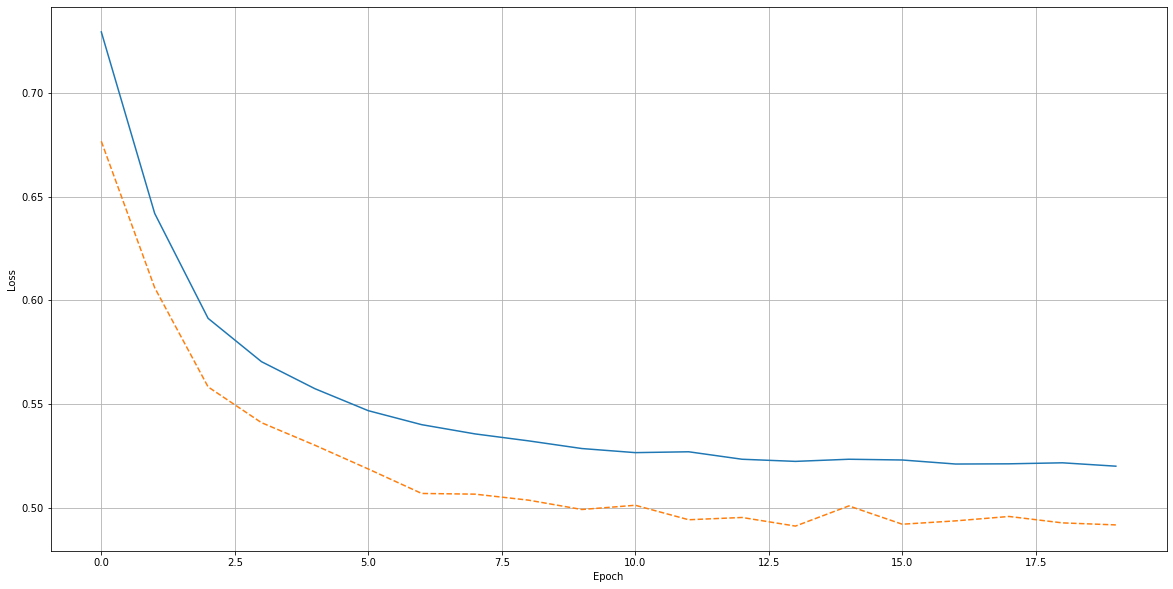

In [13]:
def plot_loss(history):
    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, history.history['val_loss'], linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()

plot_loss(history)

## 7. Performance and evaluation

In this section we are displaying the loss, accuracy and recall values on each epoch with plots for both training and validation.

### 7.1 Evaluating plots in training and validation

Validating the model outputs are important to ensure the model's reliability. During training we use a huge amount of training data. The main aim of validating the model in the last section is that it provides an opportunity for us to improve the settings. In this section we look at all the metrics more in-depth, since in the training section we looked only at the loss plot to determine is the model overfitting.

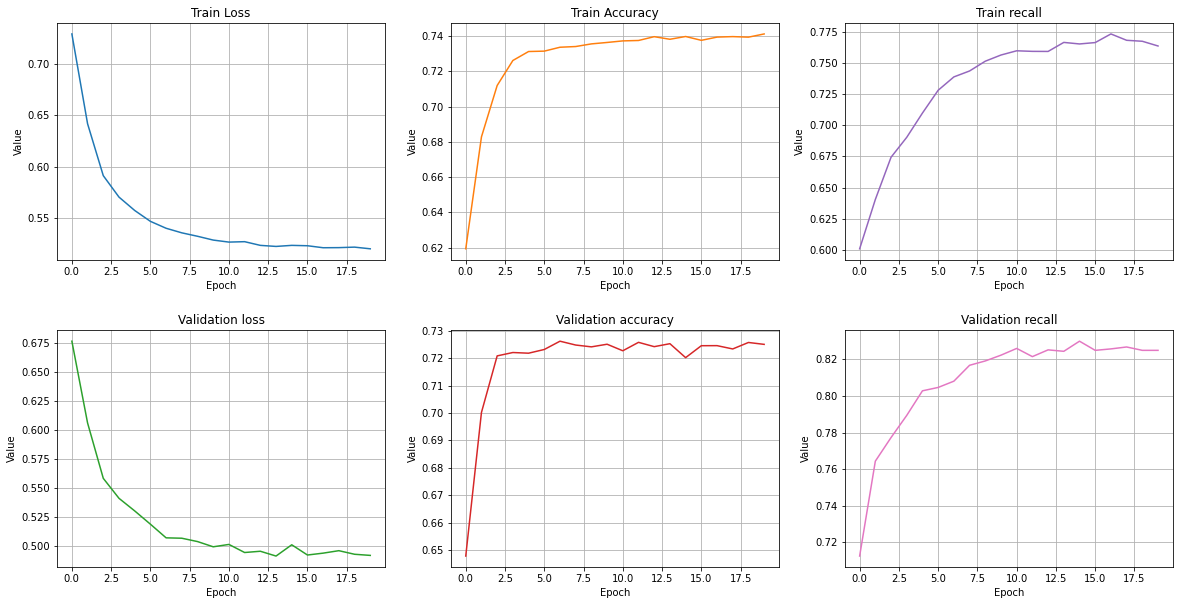

In [14]:
epochs = history.epoch
loss = history.history['loss']
acc = history.history['acc']
recall = history.history['recall']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
val_recall = history.history['val_recall']

# Plot all of the metrics
fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
axs[0, 0].plot(epochs, loss)
axs[0, 0].set_title('Train Loss')
axs[0, 0].grid()
axs[0, 1].plot(epochs, acc, 'tab:orange')
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].grid()
axs[0, 2].plot(epochs, recall, 'tab:purple')
axs[0, 2].set_title('Train recall')
axs[0, 2].grid()
axs[1, 0].plot(epochs, val_loss, 'tab:green')
axs[1, 0].set_title('Validation loss')
axs[1, 0].grid()
axs[1, 1].plot(epochs, val_acc, 'tab:red')
axs[1, 1].set_title('Validation accuracy')
axs[1, 1].grid()
axs[1, 2].plot(epochs, val_recall, 'tab:pink')
axs[1, 2].set_title('Validation recall')
axs[1, 2].grid()

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Value')

We can see that the loss value changes significantly during the first ten epochs, and only mildly after the tenth one. The lower the models loss is, the better the model is in predicting. Loss is defined as the difference between the predicted value by the model and the true value. Loss was also the main metric we looked upon in the training section and was the metric for evaluating is the model overfitting or not. While the loss is somewhat low and descending, the value is still quite high sitting roughly at 50 %. The perfect value for loss would be at 0 %, but we accepted this loss value as we got a very healthy accuracy and recall values.

Accuracy of the model starts at around ~63 % for both training and validation. Both of the metrics rise up to ~73 % on around the tenth epoch. This percentage is not perfect, but at least acceptable. Accuracy could be higher, but we would suffer a lot of losses in recall, which is not what we want. Recall was the most important metric that we wanted to get as high as possible (aiming to high sensitivity without losing too much specificity) in this project.

Recall starts to rise from 60 - 70 % to the highest point of 77 - 83 % at the tenth epoch. The percentages don't get lower or get higher too much and settle down to to the percentages at the tenth epoch which is really good and what we were aiming for in this project. At these result we were really happy, since we tried many other settings to no avail when trying to get higher recall.

These plots can be explained by the things that happen in the neural network during training. For each epoch the accuracy and recall rise and the loss gets lower since the parameters in the neurons get changed to more optimal values to predict the outcome. In the training section we defined the <code>BATCH_SIZE</code>-variable, which determines how many instances will be checked before changing the parameters in the neurons. The lower the batch size the more parameter changes will occur, but also the runtime gets a lot longer. A lower batch size also means the model doesn't have enough samples to learn different cases from (healthy / diseased cases). An even lower amount of epochs would've sufficed (around 10 epochs), but we wanted to be more certain of the results.

> "The model is fit using a larger than default batch size of 2048, this is important to ensure that each batch has a decent chance of containing a few positive samples.
> If the batch size was too small, they would likely have no fraudulent transactions to learn from."
>
> [Tensorflow, Classification on imbalanced data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#baseline_model)

The smooth and gradual increase of accuracy and recall as well as the decrese of loss is a very good sign that the model is performing well. Below we can see the final values for the metrics with the most important one being recall in this project .

In [15]:
print(f'Training loss = {loss[-1]:.3f}')
print(f'Training accuracy = {acc[-1]:.3f}')
print(f'Training recall = {recall[-1]:.3f}')

Training loss = 0.520
Training accuracy = 0.741
Training recall = 0.764


In [16]:
print(f'Validation loss = {val_loss[-1]:.3f}')
print(f'Validation accuracy = {val_acc[-1]:.3f}')
print(f'Validation recall = {val_recall[-1]:.3f}')

Validation loss = 0.492
Validation accuracy = 0.725
Validation recall = 0.825


### 7.2 Final performance

In this section we use the test set (20 % of the orignal set) on the trained model and evaluate how well the model really performed. We use a test set, which the model hasn't "seen" before and tries to evaluate the test sets outcome by the things the model has learned during training. This is why we want the trained model to be as general as possible, because if the model has learned the specific intricacies of the training features, it wont perform as well on features it hasn't seen before.

As the final metrics, the trained model evaluated the test datasets outcomes with:
- 49.2 % loss
- 72.4 % accuracy
- **83.1 % recall (sensitivity)**

In [17]:
# Evaluate the trained model with test dataset
test_loss, test_accuracy, test_recall = model.evaluate(test_features, test_labels, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_accuracy:.3f}')
print(f'Test recall = {test_recall:.3f}')

Test loss = 0.492
Test accuracy = 0.724
Test recall = 0.831


We created a confusion matrix and a classification report, that display all of the final performance results of the model. The <code>THRESHOLD</code>-variable determines what is the cutoff point when predicting is the label classified as healthy or diseased. We can set the threshold value at 0.4 to more sensitively predict that the label is diseased. Since 0 is considered healthy and 1 is considered diseased, the cutoff point was set as 0.5. The conditional operation <code>(predictions >= THRESHOLD)</code> returns true if the prediction is equal to or higher than 0.5 (meaning diseased) and return false if the prediction is lower than 0.5 (meaning healthy). This true or false statement is then multiplied by one, which converts all [true values to 1 and false values to 0](https://stackoverflow.com/questions/2764017/is-false-0-and-true-1-an-implementation-detail-or-is-it-guaranteed-by-the) so that the prediction is always either 1 or 0. No other answer is accepted, because this is a binary classification problem.

In [18]:
THRESHOLD = 0.5

# Predict the outcomes of the test dataset
predictions = model.predict(test_features)
pred_labels = 1.0 * (predictions >= THRESHOLD)
cm = confusion_matrix(test_labels, pred_labels)

# Show the outcomes
tn, fp, fn, tp = confusion_matrix(test_labels, pred_labels).ravel()
print(f'              Confusion matrix      ')
print(f'                 Prediction         ')
print(f'Diagnose  Healthy   Disease      SUM')
print(f'Healthy  {tn:8d}  {fp:8d} {tn+fp:8d}')
print(f'Disease  {fn:8d}  {tp:8d} {fn+tp:8d}')
print(f'SUM      {tn+fn:8d}  {fp+tp:8d} {tn+fp+fn+tp:8d}')

              Confusion matrix      
                 Prediction         
Diagnose  Healthy   Disease      SUM
Healthy     32789     13175    45964
Disease       806      3966     4772
SUM         33595     17141    50736


We also made a graph of the confusion matrix for clarity.

<AxesSubplot:>

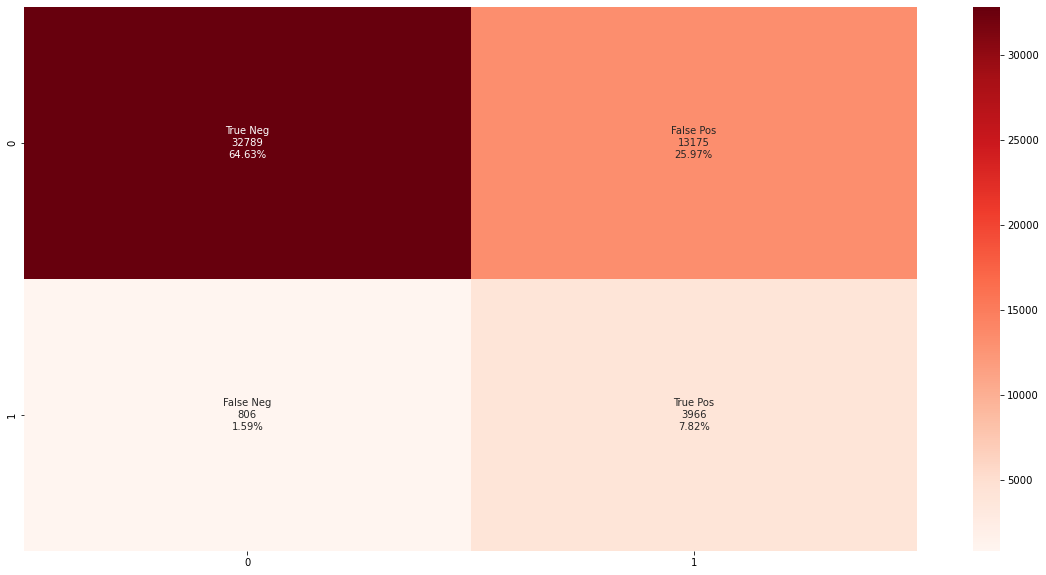

In [19]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

# Show the outcomes graphically
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap="Reds")

The percetage of diseased instances in the test set is 4772 (diseased) / 50 736 (total) * 100 = 9.4 %. This is about the same amount as in the original dataset (a little less).

From the graph of the confusion matrix, we can see that out of the 9.4 % diseased population ~7.8 % were found diseased (which achieves a high sensitivity for us). Only ~1.6 % of the diseased were missed. This is the most important thing to look at and essentially it means that out of the 9.4 % diseased instances almost 8 % were found correctly (meaning they really had a disease). This is what we wanted. Even though we sacrifice quite much by misclassifying ~26 % of healthy instances as diseased, we still find the truly diseased instances quite well. It is much more important to find the diseased individuals rather than misclassifying healthy ones. Another reason this is important is because we can achieve quite high accuracy (about 90 %) by just classifying everyone as healthy, since only a mere 9.4 % of the instances have the disease. This is of course incorrect, since we are trying to find the instances which do have a disease.

As numbers, out of 4772 diseased instances in the test set, 3966 were classified diseased correctly and 806 incorrectly. Out of 45 964 healthy individuals, 32 789 were classified as healthy correctly and 13 175 incorrectly.

Around ~65 % were classified as healthy correctly, which is also good.

In [20]:
# Classify the outcomes
cr = classification_report(test_labels, pred_labels, target_names = ['Healthy', 'Disease'])
print(cr)

              precision    recall  f1-score   support

     Healthy       0.98      0.71      0.82     45964
     Disease       0.23      0.83      0.36      4772

    accuracy                           0.72     50736
   macro avg       0.60      0.77      0.59     50736
weighted avg       0.91      0.72      0.78     50736



In [21]:
# Print the most important metrics of the report
print(f'Sensitivity = {tp/(tp+fn):.2f} %')
print(f'Specificity = {tn/(tn+fp):.2f} %')

Sensitivity = 0.83 %
Specificity = 0.71 %


The main objective in this model was to achieve a <u>high sensitivity rate without losing too much specificity</u>. With the trained model and test set we got a **sensitivity rate of 83 %** and a **specifity rate of 71 %**.

The reason we believe why we got such a good sensitivity is because of weights. The model pays way more attention to the diseased classification than to the healthy classification.

# 8. Discussion and conclusions

We tested different settings to find the best, simplest and fastest way to get reasonably good results with the model. We started by changing the amount of neurons and hidden layers. Results didn't improve much by adding hidden layers so we decided to only use one hidden layer and tried to find the smallest amount for neurons. We tested different models where the range of neurons varied from 2 to 10 and got almost the same results, except with 2 neurons where we got errors regarding dividing by zero in additional to slightly lower metrics. So we decided to use five neurons which seemed like the right amount.

We continued by changing epochs and batch size. With higher epoch values (e.g. 100 epochs), we didn't get any better results and the runtime was much longer than with lower epoch values. That is why we decided to try lower epoch values and with 20 epochs, we got really good results and the runtime was faster. We also tried changing batch size but we came to a conclusion that 2048 was the best. With lower batch size values the model performed worse.

Lastly, we set the <code>THRESHOLD</code>-value to 0.5 so predictions were distributed to healthy and diseased evenly. We also tried with values ranging from 0.2 to 0.7, but the end results weren't so good since they weren't so realistic.

So we got the best model with the following settings:

|Setting|Value|
|--|--|
|Neurons|5|
|Hidden layers|1|
|Dropout|40 %|
|Epochs|20|
|Batch size|2048| 
|Diseased weight|5.31|
|Healthy weight|0.55|
|Threshold|0.5|

The model achieved a moderately good performance with our settings. The final performance results that the model outputted when predicting the outcomes of the test dataset with these settings were as follows:

|Metric|Value|
|--|--|
|**Sensitivity / Recall**|**83 %**|
|Specificity|71 %|
|Accuracy|72 %|
|Loss|49 %|
|Execution time|3 s|

### 8.1 Main observations and learning points

We observed that for this dataset a model consisting of one hidden layer with five neurons was enough. Increasing the batch size from the default size of 32 to the size of 2048 was mandatory to achieving really good results, since it gave the model the opportunity to learn. For epochs, 20 was the most effective one relative to its runtime and the fact that after the tenth epoch not much changed. That is to say we learned that neural networks don't need to be overly large and complex to achieve relatively good results. We learned to work with datasets using Python and various libraries, such as Pandas, Tensorflow, Seaborn and Scikit-learn.

### 8.2 Model improvements

We spent a lot of time tweaking the settings to find the best ones that achieve realible results for the aim of the report. The aim of the report in this case was to find the best solution for high sensitivity without losing too much specificity. The model of course can be improved with better settings, we chose to use a more simpler model (which was also an aim of this report) to achieve this goal. This meant that we had to sacrifice a little bit of sensitivity and specificity. The model can be a little more complex, which would amount to a better result, but not too much better. Changing the way normalization is done, increasing or decreasing dropout or using scaling could improve the results also. Different batch size could also be a factor.

The model can be tweaked in many ways depending on what you want to accomplish with it. This is the reason why for example our models accuracy is not so high like it could be. Our loss is also pretty high, which could've been lower with different modifications to the model.
